🔍 First 5 rows:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   

C:\Users\sowmi\AppData\Local\Temp\ipykernel_2756\1362738295.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\sowmi\AppData\Local\Temp\ipykernel_2756\1362738295.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

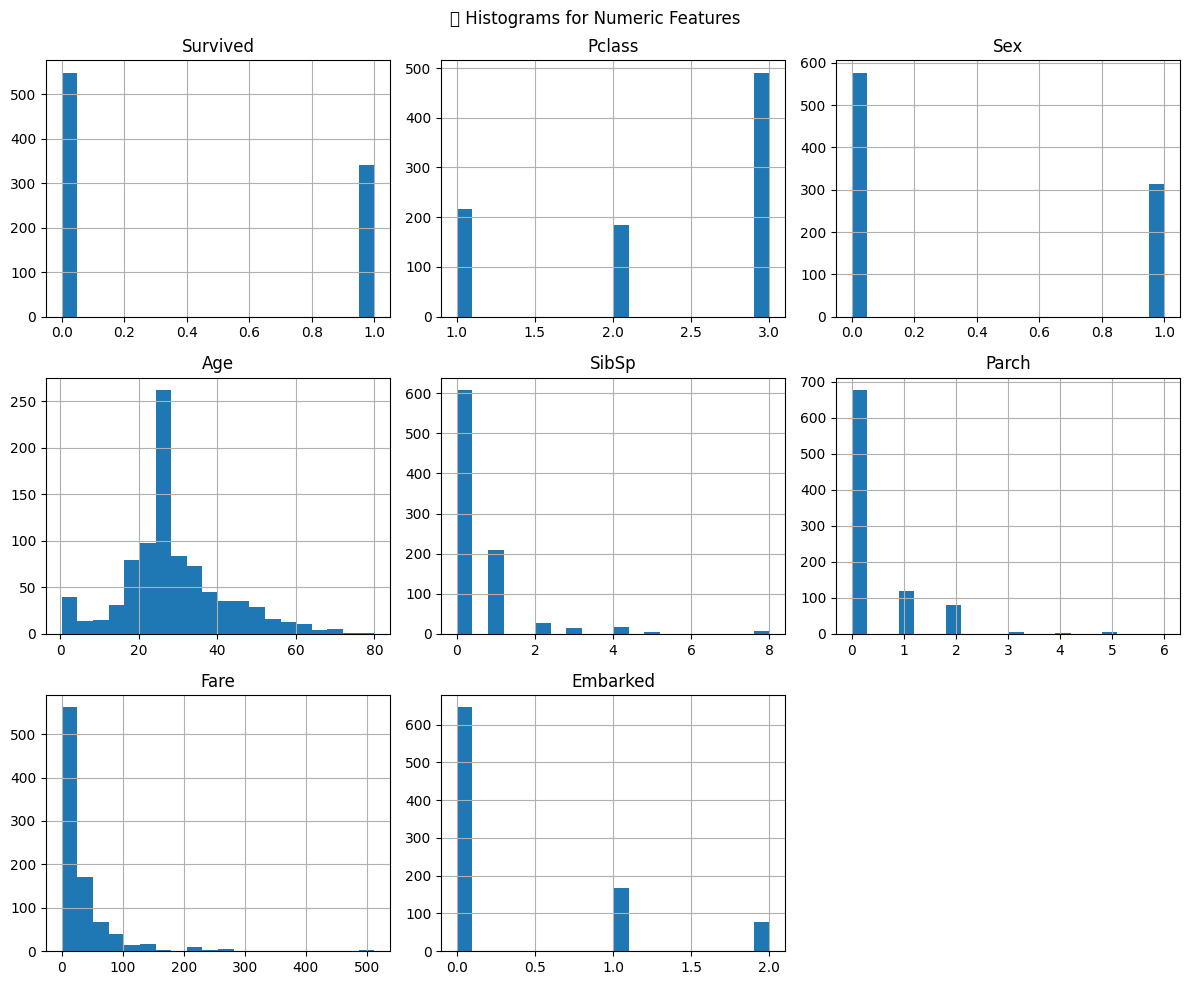

C:\Users\sowmi\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


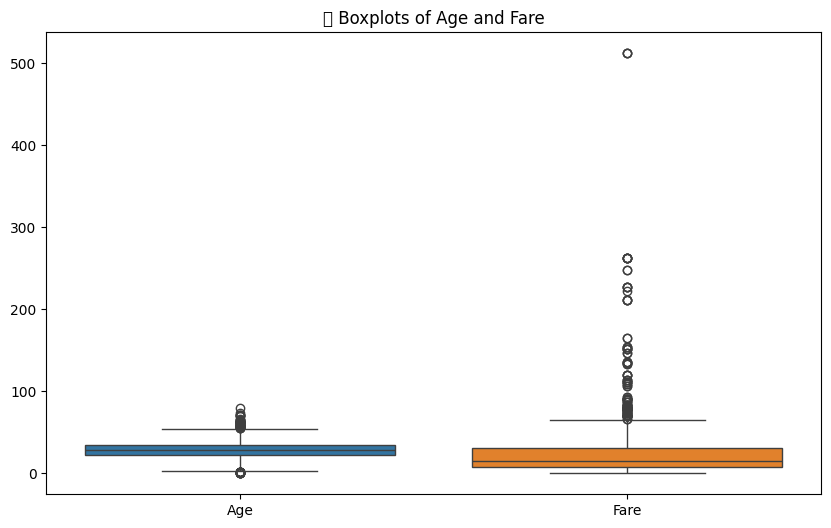

C:\Users\sowmi\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


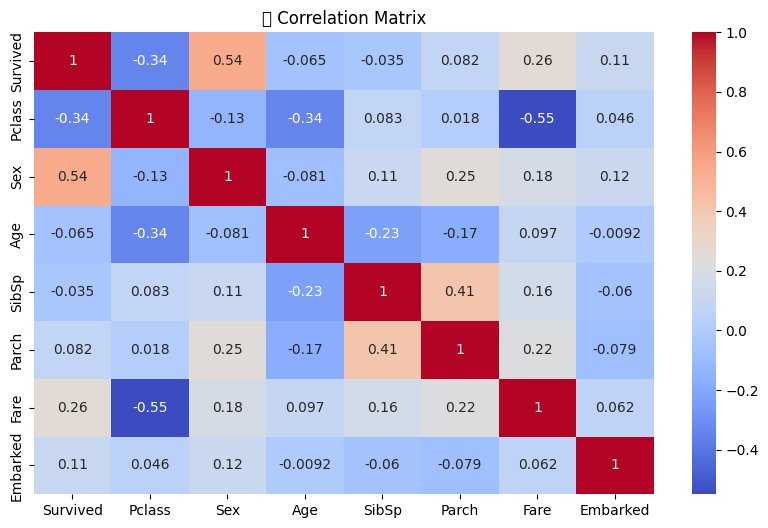

C:\Users\sowmi\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128247 (\N{CAMERA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


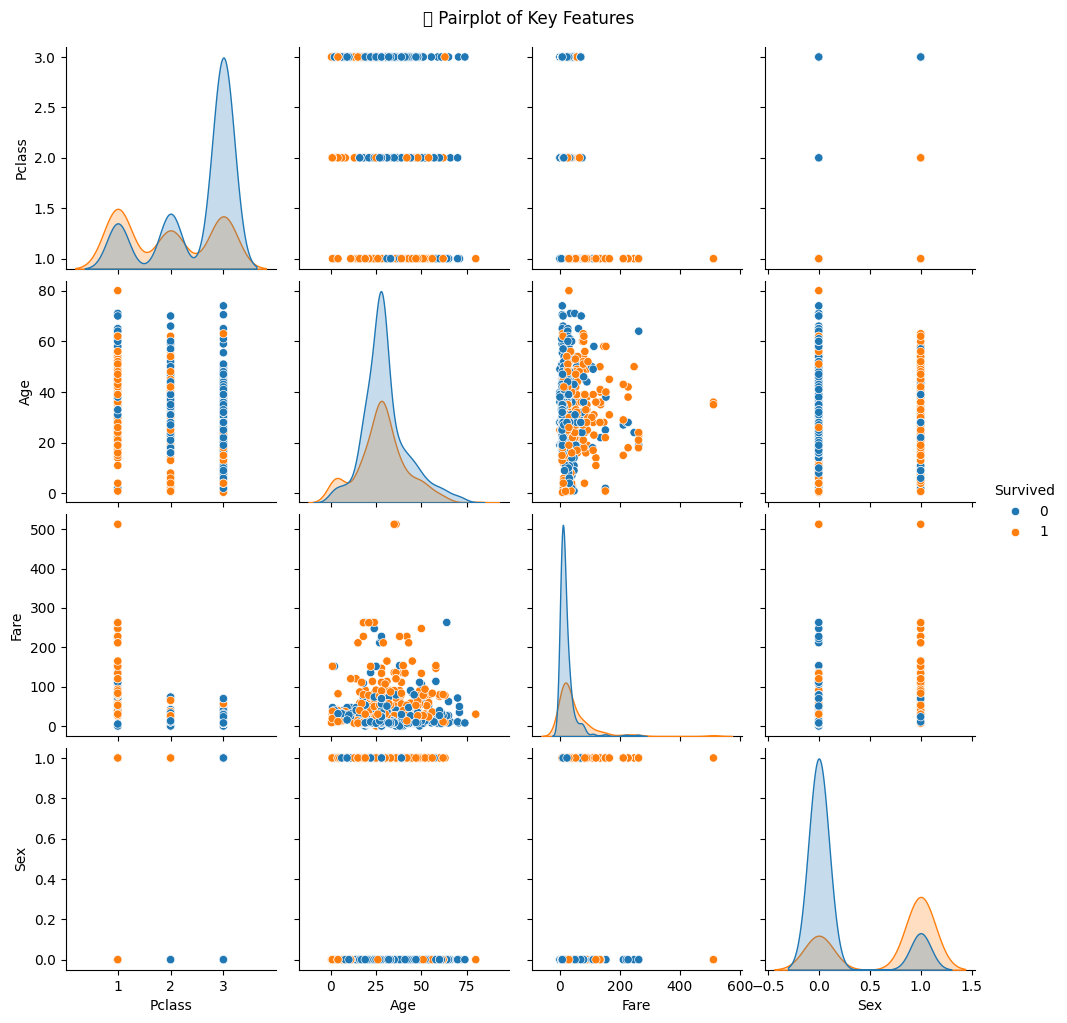

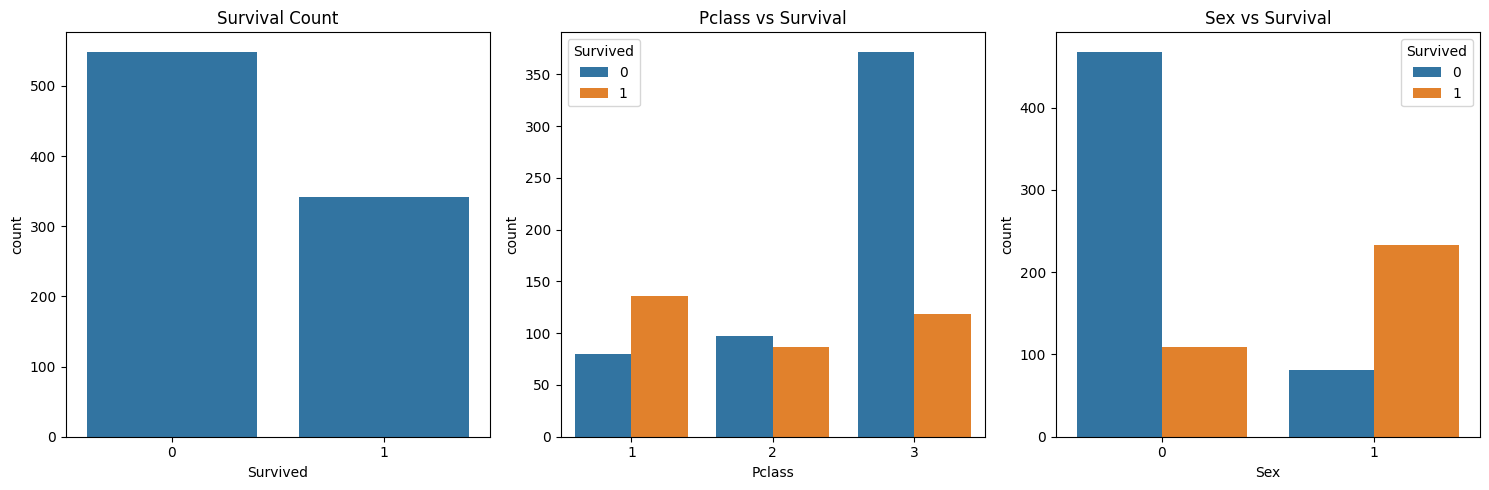

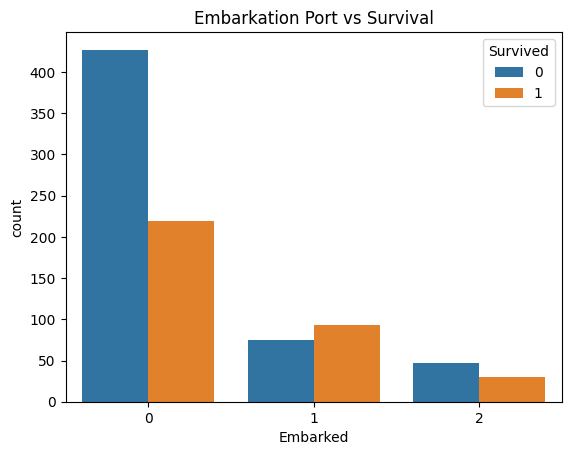

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Display first few rows
print("🔍 First 5 rows:\n", df.head())

# Basic Information
print("\n📊 Dataset Info:")
df.info()

# Summary statistics
print("\n📈 Summary Statistics:\n", df.describe(include='all'))

# Check for missing values
print("\n❗ Missing Values:\n", df.isnull().sum())

# Drop columns with too many missing values or irrelevant features
df.drop(columns=['Cabin', 'PassengerId', 'Name', 'Ticket'], inplace=True)

# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# --- Visualizations ---

# Histogram for numeric features
df.hist(bins=20, figsize=(12, 10))
plt.suptitle("📊 Histograms for Numeric Features")
plt.tight_layout()
plt.show()

# Boxplots to see outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title("📦 Boxplots of Age and Fare")
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("🔗 Correlation Matrix")
plt.show()

# Pairplot
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare', 'Sex']], hue='Survived')
plt.suptitle("📷 Pairplot of Key Features", y=1.02)
plt.show()

# Countplots for categorical features
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')

plt.subplot(1, 3, 2)
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Pclass vs Survival')

plt.subplot(1, 3, 3)
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Sex vs Survival')

plt.tight_layout()
plt.show()

# Embarked vs Survival
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title("Embarkation Port vs Survival")
plt.show()


